In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./input/IRIS.csv


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [3]:
dataset=pd.read_csv("./input/IRIS.csv")

print(dataset['species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


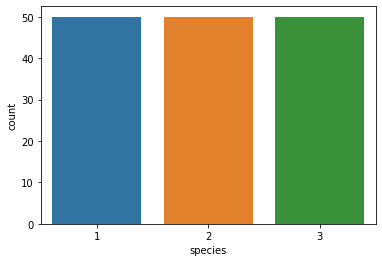

In [10]:
sns.countplot(x='species',data=dataset)
species={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}
dataset=dataset.replace({'species':species})
plt.savefig('train_data_species.png')

In [12]:
dataset.corr()['species']

sepal_length    0.782561
sepal_width    -0.419446
petal_length    0.949043
petal_width     0.956464
species         1.000000
Name: species, dtype: float64

In [5]:
X = np.array(dataset['petal_width'])
X = X.reshape(-1, 1)
Y = np.array(dataset['petal_length'])
Y = Y.reshape(-1, 1)

In [6]:
#We use single linkage in our model and distance between data will be calculated using euclidean distange method.
HCA=AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage ="ward") 
HCA.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0])

In [7]:
linked1 = linkage(X, 'single')
linked2 = linkage(Y, 'single')

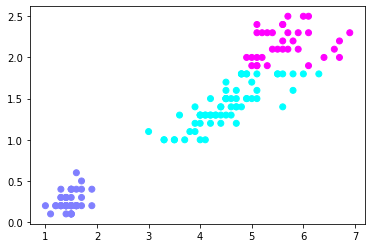

In [22]:
plt.scatter(dataset['petal_length'], dataset['petal_width'], c=HCA.labels_, cmap='cool')
plt.show()